# Teaching Data Science

Miles Berry

University of Roehampton

16 January 2021, CSTA 2021

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/milesberry/ds4k12/master?filepath=csta2021.ipynb) 

This notebook: [bit.ly/csta2021](http://bit.ly/csta2021)

Press space to move on, click in a box to edit, shift-enter to run.

# Find motivating contexts for teaching computer science

* Animation
* Games
* Robotics
* Art
* Music

* Statistics

> Foundational training in data skills begins
at school, and there is an opportunity
and a need to consult broadly on a future
curriculum that addresses the breadth of data
skills across mathematics and science, the
arts and humanities. Students need to be well
informed about the ever-widening range of
opportunities working with data. 

[Royal Society, 2019](https://royalsociety.org/-/media/policy/projects/dynamics-of-data-science/dynamics-of-data-science-skills-report.pdf)

## Curriculum design - computing

* Foundations - computer science
* Applications - information technology
* Implications - digital literacy

## Curriculum design - data science

* Foundations - probability and statistics
* Applications - using software and writing code
* Implications - question everything; trust no one

## Data science in CSTA standards

**5-7 year olds**: Collect and present the same data in various visual formats. Identify and describe patterns in data visualizations, such as charts or graphs, to make
predictions.

**8-11 year olds**: Organize and present collected data visually to highlight relationships and support a claim. Use data to highlight or propose cause-and-effect relationships, predict outcomes, or communicate an idea.

**11-14 year olds**: Collect data using computational tools and transform the data to make it more useful and
reliable. Refine computational models based on the data they have generated.


## Data science in CSTA standards

**14-16 year olds**: Create interactive data visualizations using software tools to help others better understand
real-world phenomena. Create computational models that represent the relationships among different elements of data collected from a phenomenon or process.

**16-18 year olds**: Use data analysis tools and techniques to identify patterns in data representing complex systems. Select data collection tools and techniques to generate data sets that support a claim or communicate information. Evaluate the ability of models and simulations to test and support the refinement of hypotheses.


# Which tools?

* Excel or Google Sheets, Tableau, **Python** (with [Pandas](https://pandas.pydata.org/) and [Seaborn](https://seaborn.pydata.org/)), R
* IDLE, Atom or Visual Studio Code, **[Jupyter](https://jupyter.org/)**
* Google Colab, Azure Notebooks, **[Binder](https://mybinder.readthedocs.io/en/latest/introduction.html)** with [Rise](https://rise.readthedocs.io/en/stable/)

*Other tools are available!*

# Foundations

## Introducing probability and statistics: 
## dice rolling

We'll start by loading a few standard libraries

In [2]:
from random import randint # pseudorandom whole numbers
from math import sqrt      # squareroots

import matplotlib.pyplot as plt # basic graphics library
%matplotlib inline         
                           # have Jupyter display static graphics inline
plt.style.use('ggplot')    # ggplot style graphics
plt.rcParams['figure.figsize'] = [10, 6] # make the graphs a bit bigger

import warnings            # how should we deal with Python warnings?
warnings.filterwarnings('ignore') # just ignore them. This is a good rule for life. 

Let's start by creating a function to roll a dice, and then rolling lots of dice lots of times.

In [3]:
def roll(dice=1,sides=6):
  score = 0
  for i in range(dice):
    score += randint(1,sides)
  return score

def rolls(dice=1,sides=6,times=1):
  scores = []
  for i in range(times):
    scores.append(roll(dice,sides))
  return scores

example = rolls(2,6,100) # roll two, 6-sided dice, 100 times.

example[:20]


[8, 3, 10, 7, 5, 10, 8, 3, 8, 4, 6, 6, 7, 4, 7, 7, 4, 3, 6, 2]

Can we work out the relative frequency (observed probability) of particular scores? 

In [4]:
def relativeFrequency(x, data):
    return(data.count(x) / len(data))

relativeFrequency(7, example)

0.14

Can we get the relative frequencies for all the possible scores?

Could we see that on a bar chart?

In [5]:
relativeFrequencies = []
for i in range(1, 13):
    relativeFrequencies.append(relativeFrequency(i, example))

relativeFrequencies

# plt.bar(range(1, 13), relativeFrequencies)

[0.0, 0.03, 0.1, 0.08, 0.11, 0.17, 0.14, 0.13, 0.1, 0.07, 0.03, 0.04]

## Computing statistics

* Mean
* Mode
* Median
* Range
* Standard deviation

Finding the mean

In [6]:
def mymean(data):
    total = 0
    count = 0
    for i in data:
        total += i
        count += 1
    return total/count

mymean(example)

6.68

Other approaches to calculating the mean:

Using sum:
```python
def mymean(data):
    return sum(data)/len(data)
```
Using higher order functions:
```python
from functools import reduce

def mymean(data):
    return((reduce(lambda total, item: total + item, data, 0)) / 
           (reduce(lambda count, item: count + 1, data, 0)))

```
Using the mean function!
```python
from statistics import mean
```


To work out the mode of our data, we need to know which item came up with the greatest frequency, so we may as well work out a frequency table...

In [9]:
def freqtable(data):
    freqtable = {}
    for i in data:
        if i in freqtable.keys():
            freqtable[i] += 1
        else:
            freqtable[i] = 1
    return(freqtable)

freqtable(example)

# sorted(freqtable(example).items())

{8: 13, 3: 10, 10: 7, 7: 14, 5: 11, 4: 8, 6: 17, 2: 3, 9: 10, 12: 4, 11: 3}

If we've got a frequency table, we may as well plot a bar chart...

<BarContainer object of 11 artists>

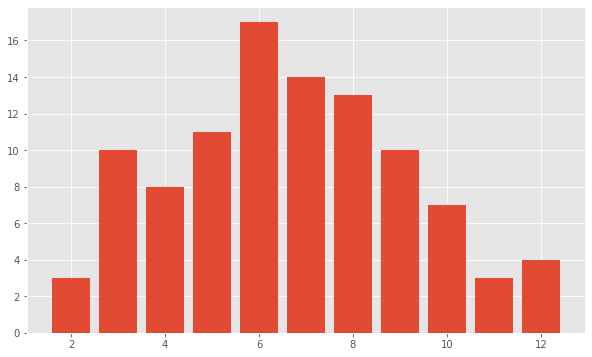

In [10]:
plt.bar(freqtable(example).keys(),freqtable(example).values())

This is exactly the same shape as our relative frequencies earlier. Why is that?

In [11]:
def mymode(data):
    mode = 0
    max = 0
    freqs = freqtable(data)
    for i in freqs.keys():
        if freqs[i]>max:
            max=freqs[i]
            mode = i
    return mode

mymode(example)

6

Finding the median

In [12]:
def quicksort(data):
    if len(data)==0:
        return data
    else:
        lower = [x for x in data[1:] if x < data[0]]
        upper = [x for x in data[1:] if x >= data[0]]
        return quicksort(lower) + [data[0]] + quicksort(upper)

def mymedian(data):
    l = len(data)
    if l % 2 == 1:
        return quicksort(data)[l // 2]
    else:
        return quicksort(data)[(l+1)//2]
    
mymedian(example)

7

Is it *absolutely* necessary to sort the data to find the median? The above algorithm is O(n log n). I can think of an O(n + k log k) algorithm, where k is the number of distinct values...

Finding the range

In [13]:
def myrange(data):
    minimum = float('inf')
    maximum = float('-inf')
    for i in data:
        if i < minimum:
            minimum = i
        if i > maximum:
            maximum = i
    return (maximum - minimum)


myrange(example)

10

Finding the standard deviation. Which algorthm do you like best?

In [11]:
def mysd1(data):
    '''sqrt of mean squared deviations'''
    m = mymean(data)
    squaredDeviations = map(lambda x: (x-m)**2, data)
    return sqrt(mymean(squaredDeviations))

def mysd2(data):
    '''sqrt of (mean of squares - square of means)'''
    return sqrt((mymean(map(lambda x: x**2, data)) - mymean(data)**2))

print('method 1',mysd1(example))
print('method 2',mysd2(example))

method 1 2.725876005984131
method 2 2.725876005984131


# Applications

## Data analysis in Python: 
## Working with historical weather data

<img src="./tree.jpg">

Temperatures in Godalming, 2017

![New Zealand Census Bureau](https://i0.wp.com/new.censusatschool.org.nz/wp-content/uploads/2012/11/data-detective.png?resize=800%2C600&ssl=1)

[New Zealand Census at School](https://new.censusatschool.org.nz/)

## Start with interesting questions

* Is winter wetter than summer?
* Is spring hotter than fall?
* Has the climate changed?

For this, we'll import some of Python's libraries rather than creating all this ourselves!

In [14]:
import pandas as pd # data handling toolbox
import requests     # tool to download data off the web
import datetime     # dates and times are horrible. This makes things a little easier.
import seaborn as sns # nice graphics toolbox, built on, and transforming matplotlib
sns.set()           # ggplot style graphs
import scipy.stats  # statistical testing


We'll also download the historical (month by month) weather data for the Heathrow weather station from the [UK Met Office](https://www.metoffice.gov.uk/research/climate/maps-and-data/historic-station-data) website. 

If you're going to try this in school, use something more local?

In [15]:
url = 'https://www.metoffice.gov.uk/pub/data/weather/uk/climate/stationdata/heathrowdata.txt'
raw = requests.get(url, allow_redirects=True)
open('data.txt','wb').write(raw.content)

46232

What follows is unpleasant.

Transforming the data into a usable format is non-trivial, requires attention to detail and is specific to the particular use case.

In general, do this for pupils, or have them do this in Excel where they can see what they're doing.

In [30]:
dataset = pd.read_csv("data.txt", skiprows=[0,1,2,3,4,5],
                      names=['yyyy', 'mm', 'tmax', 'tmin', 'af', 'rain', 'sun', 'notes'],
                      delim_whitespace=True, warn_bad_lines=True, error_bad_lines=False, na_values='---')
dataset['sun'] = dataset['sun'].str.replace(r'#', '')
dataset = dataset.drop([0])
dataset['date'] = dataset.apply(lambda x: datetime.date(int(x['yyyy']), int(x['mm']), 1), axis=1)
dataset.index = dataset['date']
dataset.index = pd.to_datetime(dataset.index)
dataset.index = dataset.index.to_period('M')
dataset = dataset.drop(['date'], axis=1)
dataset = dataset.drop(['notes'], axis=1)
dataset['mm'] = dataset['mm'].astype('int')
dataset['tmax'] = dataset['tmax'].astype('float')
dataset['tmin'] = dataset['tmin'].astype('float')
dataset['temp'] = (dataset['tmax']+dataset['tmin'])/2
dataset['af'] = dataset['af'].astype('float', errors='ignore')
dataset['rain'] = dataset['rain'].astype('float')
dataset['sun'] = dataset['sun'].astype('float', errors='ignore')
dataset = dataset[['yyyy','mm','tmin','tmax','temp','af','rain','sun']]
dataset[-3:].round(1)

,yyyy,mm,tmin,tmax,temp,af,rain,sun
date,,,,,,,,
2020-10,2020,10,8.8,15.0,11.9,0.0,142.2,51.6
2020-11,2020,11,6.2,12.7,9.4,2.0,50.2,44.6
2020-12,2020,12,3.5,8.5,6.0,7.0,72.4,36.5


Adding columns to identify seasons and decades

In [31]:
seasons = {12:'winter',1:'winter',2:'winter',
           3:'spring',4:'spring',5:'spring',
           6:'summer',7:'summer',8:'summer',
           9:'fall',10:'fall',11:'fall'}

dataset['season'] = ((dataset.index.month).map(seasons))
dataset['decade'] = ((dataset.index.year).map(lambda y : str(y//10)+'0s'))

dataset[-5:]

,yyyy,mm,tmin,tmax,temp,af,rain,sun,season,decade
date,,,,,,,,,,
2020-08,2020,8,15.6,25.6,20.60,0.0,58.2,161.8,summer,2020s
2020-09,2020,9,11.2,21.6,16.40,0.0,20.0,168.9,fall,2020s
2020-10,2020,10,8.8,15.0,11.90,0.0,142.2,51.6,fall,2020s
2020-11,2020,11,6.2,12.7,9.45,2.0,50.2,44.6,fall,2020s
2020-12,2020,12,3.5,8.5,6.00,7.0,72.4,36.5,winter,2020s


So what have we got here?

In [33]:
dataset.describe().round(1)

,mm,tmin,tmax,temp,af,rain,sun
count,876.0,876.0,876.0,876.0,864.0,876.0,768.0
mean,6.5,7.1,14.9,11.0,2.9,50.5,129.3
std,3.5,4.5,5.8,5.1,4.7,29.8,65.0
min,1.0,-4.6,0.8,-1.9,0.0,0.3,18.5
25%,3.8,3.4,9.8,6.6,0.0,28.0,68.5
50%,6.5,6.6,14.8,10.7,0.0,46.8,126.2
75%,9.2,11.2,20.1,15.6,5.0,68.8,176.7
max,12.0,16.7,28.3,22.4,28.0,174.8,310.1


## We might start by just exploring the data we have.

We hardly had any rain last May here. How unusual was that?

In [34]:
dataset[dataset.rain<=3].sort_values(by='rain')

,yyyy,mm,tmin,tmax,temp,af,rain,sun,season,decade
date,,,,,,,,,,
1995-08,1995,8,15.6,27.0,21.30,0.0,0.3,295.3,summer,1990s
2018-06,2018,6,13.1,24.2,18.65,0.0,0.4,234.5,summer,2010s
1978-10,1978,10,8.4,17.1,12.75,0.0,1.6,98.4,fall,1970s
2020-05,2020,5,9.1,21.1,15.10,0.0,2.0,308.6,spring,2020s
1956-02,1956,2,-3.6,2.9,-0.35,22.0,2.3,NaN,winter,1950s
1959-02,1959,2,1.2,7.4,4.30,7.0,2.4,54.8,winter,1950s
1993-02,1993,2,2.5,7.2,4.85,2.0,2.4,51.0,winter,1990s
2011-04,2011,4,8.6,19.7,14.15,0.0,2.4,218.0,spring,2010s


We can do more complex queries. 

Show me all the months where the minimum was below 0ºC or where there were more than 15 days of frost:

In [35]:
dataset[(dataset.tmin < 0) | (dataset.af > 15)].sort_values(by='tmin')[:10]


,yyyy,mm,tmin,tmax,temp,af,rain,sun,season,decade
date,,,,,,,,,,
1963-01,1963,1,-4.6,0.8,-1.90,28.0,12.9,38.4,winter,1960s
1956-02,1956,2,-3.6,2.9,-0.35,22.0,2.3,NaN,winter,1950s
1986-02,1986,2,-2.7,1.7,-0.50,24.0,14.5,61.9,winter,1980s
1979-01,1979,1,-2.6,3.8,0.60,24.0,59.9,58.5,winter,1970s
1963-02,1963,2,-2.2,2.8,0.30,24.0,6.6,72.2,winter,1960s
1985-01,1985,1,-1.8,4.1,1.15,20.0,41.3,46.9,winter,1980s
2010-12,2010,12,-1.5,3.9,1.20,21.0,21.4,18.5,winter,2010s
1981-12,1981,12,-1.5,4.4,1.45,17.0,85.3,47.0,winter,1980s
1991-02,1991,2,-1.3,5.4,2.05,16.0,34.7,48.5,winter,1990s


We can easily summarise the data. 

What's the average maximum temperature for each month of the year?

In [37]:
dataset.groupby(dataset.index.month).temp.mean().round(1)

date
1      4.8
2      5.0
3      7.1
4      9.6
5     13.0
6     16.2
7     18.2
8     17.9
9     15.4
10    11.8
11     7.7
12     5.5
Name: temp, dtype: float64

OK, but what does that look like on a graph?

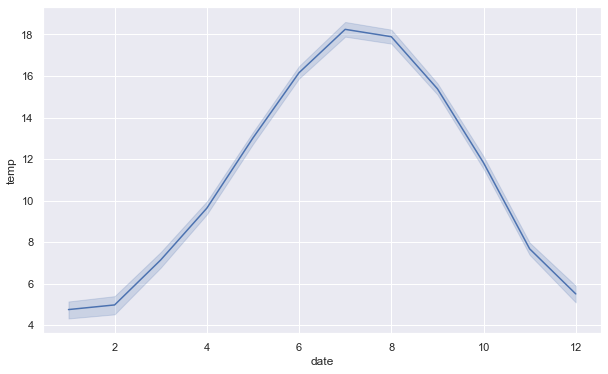

In [38]:
sns.lineplot(dataset.index.month,dataset.temp)

## Can we have a look at those season questions now?

* Is winter wetter than summer?
* Is spring hotter than fall?

In [45]:
dataset.groupby(dataset.season,sort=False).mean().round(1).drop(columns=['mm'])

,tmin,tmax,temp,af,rain,sun
season,,,,,,
winter,2.1,8.0,5.1,8.3,50.3,58.3
spring,5.6,14.2,9.9,2.0,43.6,155.6
summer,12.7,22.2,17.4,0.0,50.3,195.6
fall,7.9,15.3,11.6,1.4,58.0,107.6


Comparing rainfall by season:

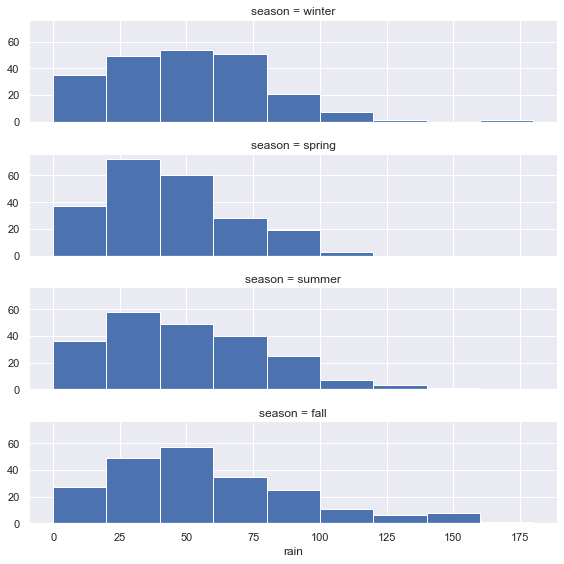

In [46]:
g = sns.FacetGrid(dataset, row="season", aspect=4, height=2)
g = g.map(plt.hist,"rain",bins=list(range(0,200,20)))

Easier to see as a box plot?

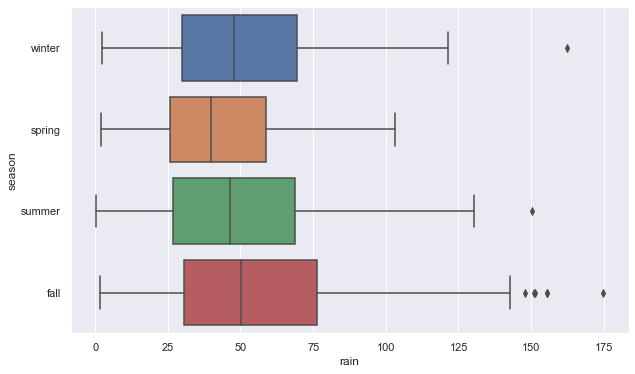

In [47]:
sns.boxplot(dataset.rain,dataset.season)

OK, so there's a difference between winter and summer, but is it significant?

In [48]:
scipy.stats.ttest_ind(dataset[dataset['season']=='winter'].rain,
                      dataset[dataset['season']=='summer'].rain)

Ttest_indResult(statistic=0.002189586543890653, pvalue=0.9982539655540041)

What about the temperatures?

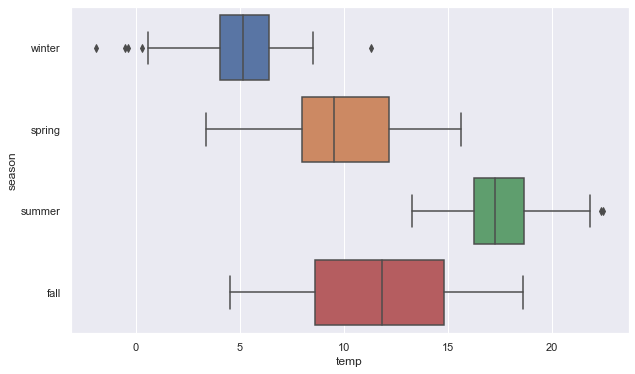

In [49]:
sns.boxplot(dataset.temp,dataset.season)

There's a difference between spring and autumn, but is this significant?

In [52]:
scipy.stats.ttest_ind(dataset[dataset['season']=='spring'].temp,
                      dataset[dataset['season']=='fall'].temp)

Ttest_indResult(statistic=-5.674167158484647, pvalue=2.5439971634385407e-08)

## Are these measurements related? 

Is there a link between temperature and rainfall?|

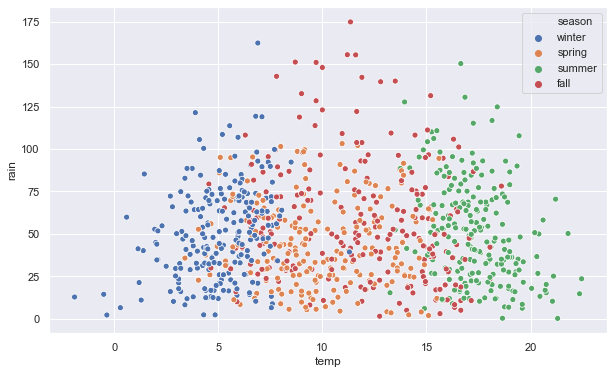

In [53]:
sns.scatterplot(dataset.temp,dataset.rain,hue=dataset.season)

What about between sunshine and temperature?

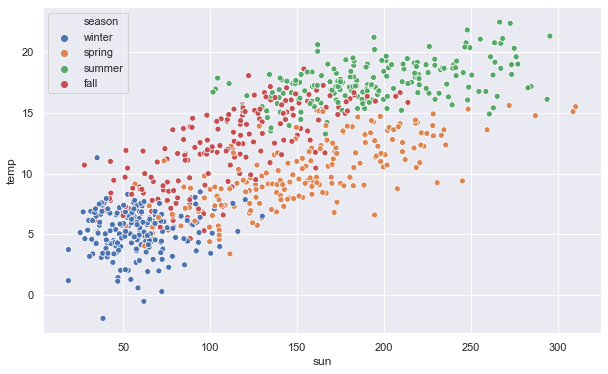

In [54]:
sns.scatterplot(dataset.sun,dataset.temp,hue=dataset.season)

## Does this data have anything to say about climate change?

How has the temperature varied over the years the data has been collected?

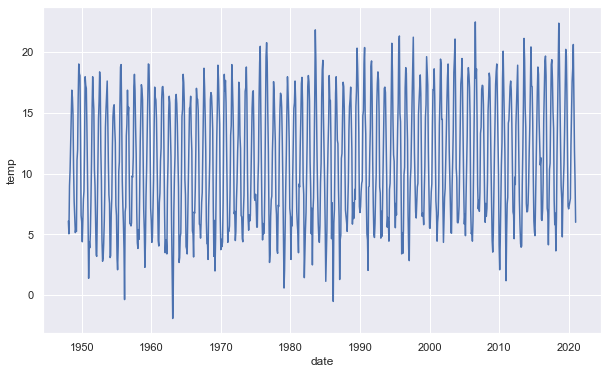

In [55]:
sns.lineplot(dataset.index.end_time,dataset.temp)

So there's a periodic pattern - summers *are* warmer than winters, but is there any overall trend?

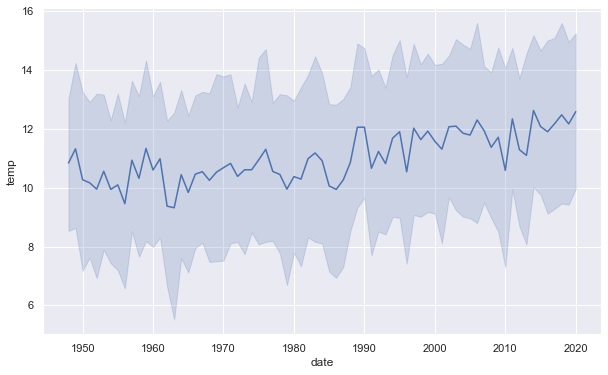

In [56]:
sns.lineplot(dataset.index.year,dataset.temp)

Well, it seems to be sloping up a bit, but it's a bit hard to see.

Are there any other ways to visualise this?

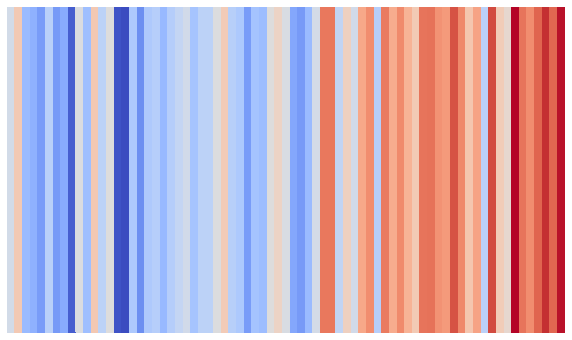

In [57]:
annual=dataset.resample('A').mean()
sns.heatmap([annual['temp']],cbar=False,xticklabels=False,yticklabels=False,cmap='coolwarm')

Hey, that looks great. Could we get that on flipflops maybe? 
More details [here](https://en.wikipedia.org/wiki/Warming_stripes). 

![Warming Stripes](https://cdn.vox-cdn.com/uploads/chorus_asset/file/15274135/Screen_Shot_2019_03_04_at_12.05.58_PM.png)

OK, so that's year by year. What about over the decades?

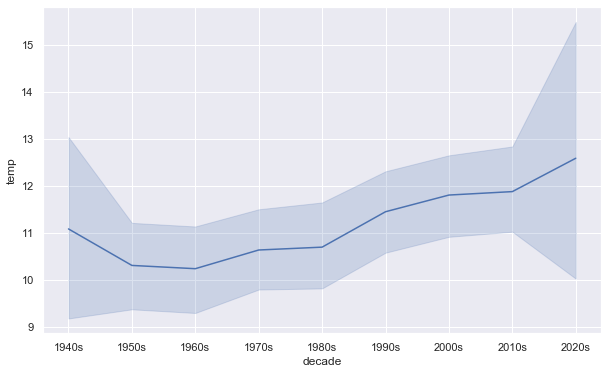

In [58]:
sns.lineplot(dataset.decade,dataset.temp)

But you've only got a year and a bit of data from the 1940s, and just six months from the 2020s. 

Can't we get rid of those years?

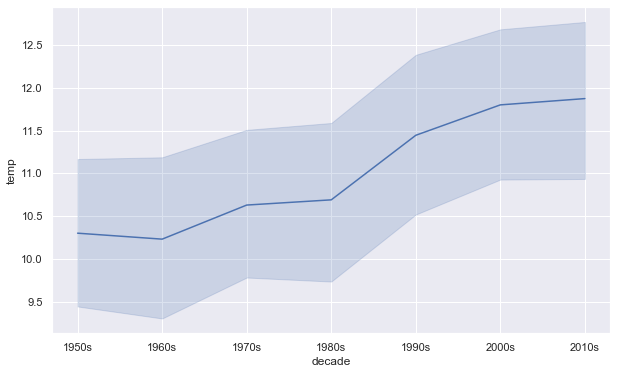

In [60]:
dataset2=dataset[(dataset.index.year>1949) & (dataset.index.year<2020)]
sns.lineplot(dataset2.decade,dataset2.temp)

What about a five year, rolling average?

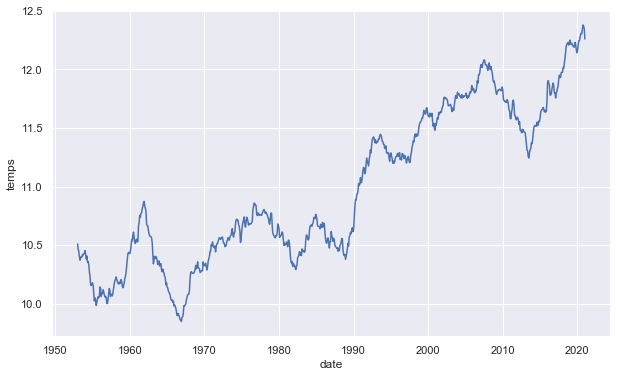

In [63]:
dataset['temps']=dataset.temp.rolling(window=60).mean()
sns.lineplot(dataset.index.end_time,dataset.temps)

# Implications

## Ethics in the time of coronavirus

Cynicism and skepticism

## Fundamental values?

> Schools should promote the fundamental British values of democracy, the rule of law, individual liberty, and mutual respect and tolerance of those with different faiths and beliefs

[DfE, 2014](https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/380595/SMSC_Guidance_Maintained_Schools.pdf)

## ACM's code of ethics

* Contribute to societiy and to human well-being
* Avoid harm
* Be honest and trustworthy
* Be fair and take action not to discriminate
* Respect the work required to produce new ideas, inventions, creative works and computing artefacts
* Respect privacy
* Honor confidentiality

[ACM, 2018](https://www.acm.org/code-of-ethics)

## Data ethics in CSTA standards

**11-14 year olds**: Compare tradeoffs associated with computing
technologies that affect people's everyday activities
and career options. Describe tradeoffs between allowing
information to be public and keeping information
private and secure.



**14-16 year olds**: Evaluate the ways computing impacts
personal, ethical, social, economic, and cultural
practices. Explain the privacy concerns related to the
collection and generation of data through automated
processes that may not be evident to users. Evaluate the social and economic
implications of privacy in the context of safety, law, or
ethics.

# Trust no one

# DO NOT TRY THIS AT HOME!

The following three slides are intended to illustrate some mistakes and dangers in conducting online surveys, particularly with young people. 

## Take my survey!

![Covid survey part 1](covidsurvey1.png)

## Take my survey!

![Covid survey part 2](covidsurvey2.png)

## Take my survey!

![Covid survey part 3](covidsurvey3.png)

## London, 1854

![John Snow's map of cholera cases](snow.jpg)

## Individual consent vs the public good?

>Because they work with whole populations, epidemiologists can see what is dangerous and what isn’t, whether particular illnesses are becoming more or less common, what treatment works and what doesn’t, and – in the case of surgeons – who is dangerous and who isn’t. **Epidemiology has helped save more lives than any of the other more glamorous branches of medicine.**

[Traynor, 2001](https://www.theguardian.com/society/2001/apr/12/3)

## Test and trace app

![NHS Covid App](nhs.png)

The app ... records:

* how long you are close to another anonymous app user
* the date and time of these encounters
* the signal strength of other anonymous app users’ Bluetooth, to work out how far apart you were from them

If you develop coronavirus symptoms and choose to share the anonymous record on your phone with the NHS, this data will be stored in a secure database in the UK.

qv Ian Levy of NCSC on [the security model](https://www.ncsc.gov.uk/blog-post/security-behind-nhs-contact-tracing-app), and Laurie Clarke of the New Statesman on [some of the security concerns](https://tech.newstatesman.com/security/nhsx-contact-tracing-app-privacy-risks)

## TraceTogether

![TraceTogether](tracetogether.jpg)

> “Data will only be used for Covid-19 contact tracing.”

...

> "Also, we want to be transparent with you. TraceTogether data may be used in circumstances where citizen safety and security is or has been affected ... The Singapore Police Force is empowered under the CPC to obtain any data, including TraceTogether data, for criminal investigations.”

## In school...

> Where an outbreak in a school is confirmed, a mobile testing unit may be dispatched to test others who may have been in contact with the person who has tested positive. Testing will first focus on the person’s class, followed by their year group, then the whole school if necessary

[DfE, July 2, 2020](https://www.gov.uk/government/publications/actions-for-schools-during-the-coronavirus-outbreak/guidance-for-full-opening-schools)

## Asymptomatic testing

> You will need to satisfy yourself that you have a lwful basis for processing the personal data. You might want to consider whether the duties prescribed in educaiton legislation on schools ... to make arrangements to safeguard and promote the welfare of pupils provide sufficeient legal basis without having to rely on consent.

[DfE, 2020](https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/950515/Schools_Colleges_Testing_Handbook_revised_04012021.pdf)

## Question everything

## 100,000 tests a day, by the end of April!

<blockquote class="twitter-tweet"><p lang="en" dir="ltr">“It is a national achievement. Achieved by a huge team of people.” – Health Secretary <a href="https://twitter.com/MattHancock?ref_src=twsrc%5Etfw">@MattHancock</a> on achieving 122,347 <a href="https://twitter.com/hashtag/coronavirus?src=hash&amp;ref_src=twsrc%5Etfw">#coronavirus</a> tests on the last day of April <a href="https://t.co/E9y8K7tf7O">pic.twitter.com/E9y8K7tf7O</a></p>&mdash; UK Prime Minister (@10DowningStreet) <a href="https://twitter.com/10DowningStreet/status/1256504068551380992?ref_src=twsrc%5Etfw">May 2, 2020</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

## ... but how many people did they test?

![tests on 30 April](covidtests.jpeg)

## ... and then what?

![daily tests, 30 April](dailytests.png)

[UK Government, May 9 2020](https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/884010/2020-05-09_COVID-19_Press_Conference_Slides__7_.pdf)

## But actually...

![Testing figures](testing.png)

## There are two ways to keep the number of COVID-19 cases down...

<blockquote class="twitter-tweet"><p lang="en" dir="ltr">Cases are going up in the U.S. because we are testing far more than any other country, and ever expanding. With smaller testing we would show fewer cases!</p>&mdash; Donald J. Trump (@realDonaldTrump) <a href="https://twitter.com/realDonaldTrump/status/1275381670561095682?ref_src=twsrc%5Etfw">June 23, 2020</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

## Meanwhile in Georgia

![Georgia COVID cases](georgia.png)

## Global comparisons

![Global deaths](globaldeaths.png)

[UK Government, May 9 2020](https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/884010/2020-05-09_COVID-19_Press_Conference_Slides__7_.pdf)

## COVID-19 Daily Deaths

![Daily Deaths](deaths.png)

>What I can tell the House is that we are getting those numbers down: the number of deaths is coming down; the number of hospital admissions is coming down.

[Boris Johnson, May 13 2020](https://hansard.parliament.uk/Commons/2020-05-13/debates/7F8336E1-EDA2-4AF8-9923-A65B8A9B3F7E/Engagements#contribution-E855A001-5197-4FF2-B7B6-178380C79A6B)

## Mobility trends

![Mobility trends](mobility.png)

[Apple](https://covid19.apple.com/mobility)

## Infection by age

![ONS Survey](ons.png)

[ONS Infection Survey](https://www.ons.gov.uk/peoplepopulationandcommunity/healthandsocialcare/conditionsanddiseases/datasets/coronaviruscovid19infectionsurveydata)

## On easing lockdown

![R and lockdown](rgraph.png)

[Boris Johnson, May 10 2020](https://www.youtube.com/watch?&v=bjvRhrJqNHI)

## COVID Alert

![Alert status](alerts.png)

[Boris Johnson, May 10 2020](https://www.youtube.com/watch?&v=bjvRhrJqNHI)

## Calculating the alert level

![Equation](equation.png)

[Boris Johnson, May 10 2020](https://www.youtube.com/watch?&v=bjvRhrJqNHI)

On current figures, the alert level is 3,316,020.2 to 3,316,020.3.

# Questions?

These slides: [bit.ly/csta2021](http://bit.ly/csta2021)

m.berry@roehampton.ac.uk

[milesberry.net](http://milesberry.net)

[@mberry](http://twitter.com/mberry)


## Recommended resources from the chat

Royal Society (2019) [Dynamics of data science skills](https://royalsociety.org/topics-policy/projects/dynamics-of-data-science/).

Grillenberger, A. and Romeike, R., 2018, October. [Developing a theoretically founded data literacy competency model](https://computingeducation.de/pub/2018_Grillenberger-Romeike_WiPSCE2018.pdf). In *Proceedings of the 13th Workshop in Primary and Secondary Computing Education* (pp. 1-10).

[Bootstrap World: Data Science](https://www.bootstrapworld.org/blog/curriculum/Data-Science-Is-Coming.shtml)

FutureLearn: [Teaching data science](https://www.futurelearn.com/courses/teaching-data-science/)

Barefoot Computing [Data Dash](https://www.barefootcomputing.org/resources/data-dash) (5-11 year olds)

NCCE [Data Science](https://www.barefootcomputing.org/resources/data-dash) unit (8th grade)

NOAA - [National Weather Service data sets](https://www.noaa.gov/organization/information-technology/list-of-big-data-program-datasets#NWS)

[ArcGIS](https://www.arcgis.com/index.htmlhttps://www.arcgis.com/index.htmlhttps://www.arcgis.com/index.html) (Geographic information system)

[Curriculum frameworks for introductory data science](http://www.idssp.org/files/IDSSP_Frameworks_1.0.pdf) (IDSSP, 2019)

[Snap! data science extensions](https://www.youtube.com/watch?v=6H8vK8Q5KeY).